In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-video-games/List of best-selling video games.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data precessing:

In [3]:
df=pd.read_csv('/kaggle/input/top-100-video-games/List of best-selling video games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  49 non-null     float64
 1   Title                 49 non-null     object 
 2   Sales                 43 non-null     object 
 3   Series                49 non-null     object 
 4   Platform(s)           49 non-null     object 
 5   Initial release date  49 non-null     object 
 6   Developer(s)[a]       49 non-null     object 
 7   Publisher(s)[a]       49 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [5]:
columns=[ 'Title', 'Sales', 'Series', 'Platform(s)',
       'Initial release date', 'Developer(s)[a]', 'Publisher(s)[a]']

In [6]:
df=df.dropna()
for i in columns:
    df[i]=df[i].str.replace('[b]','')
    df[i]=df[i].str.replace('[c]','')
    df[i]=df[i].str.replace('[e]','')
    df[i]=df[i].str.replace('[','')
    df[i]=df[i].str.replace(',','')
    df[i]=df[i].str.replace(']','')
    df[i]=df[i].str.replace('d','')
    df[i]=df[i].str.strip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True t

In [7]:
df['Release year']=df['Initial release date'].str[-4:]

In [8]:
df['Release year'][12]=df['Release year'][12].replace('y.','19')
df['Release year']=df['Release year'].str.replace('y.','20')
df=df.drop(columns='Initial release date',axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [9]:
columns2=['Sales', 'Release year']
for i in columns2:
    df[i]=df[i].astype('int')

In [10]:
df['Platform(s)']=df['Platform(s)'].str.replace('Multi-platformf','Multi-platform')
df['Platform(s)']=df['Platform(s)'].str.strip()

In [11]:
df.head()

,Rank,Title,Sales,Series,Platform(s),Developer(s)[a],Publisher(s)[a],Release year
0,1.0,Minraft,238000000,Minraft,Multi-platform,Mojang Stuios,Xox Gam Stuios,2011
1,2.0,Gran Thft Auto V,170000000,Gran Thft Auto,Multi-platform,Rokstar North,Rokstar Gams,2013
2,3.0,Ttris (EA),100000000,Ttris,Multi-platform,EA Moil,Eltroni Arts,2006
3,4.0,Wii Sports,82900000,Wii,Wii,Nintno EAD,Nintno,2006
4,5.0,PUBG: Battlgrouns,75000000,PUBG Univrs,Multi-platform,PUBG Corporation,PUBG Corporation,2017


# Data Analysis:

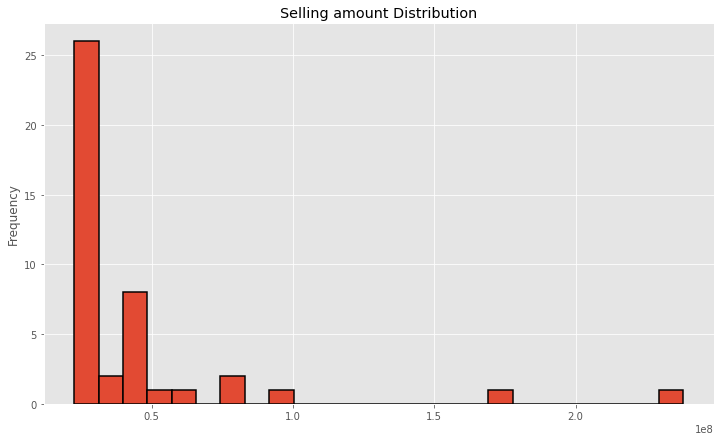

In [12]:
plt.style.use('ggplot')
df['Sales'].plot(kind='hist',figsize=(12,7),edgecolor='black',bins=25, linewidth = 1.5,title='Selling amount Distribution')
plt.show()

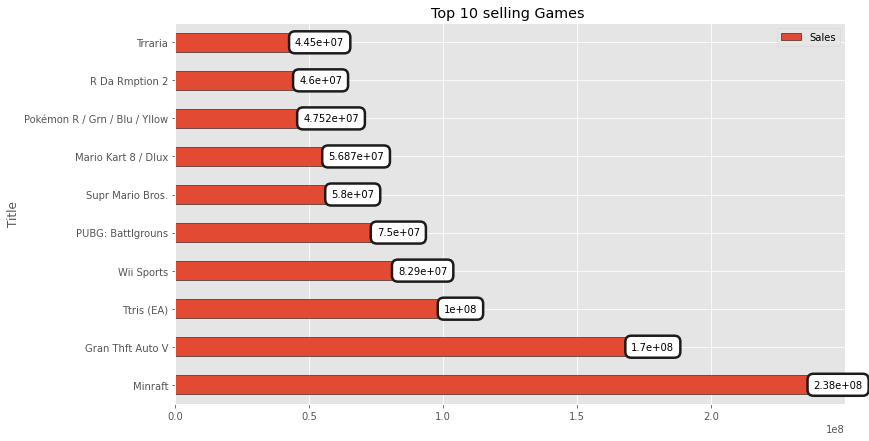

In [13]:
plt.style.use('ggplot')
topgames=pd.pivot_table(df,index='Title',values='Sales')
topgames=topgames.sort_values(by='Sales',ascending=False).head(10)
topgames
p=topgames.plot(kind='barh',figsize=(12,7),title='Top 10 selling Games ',edgecolor = 'black')
p.bar_label(p.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()




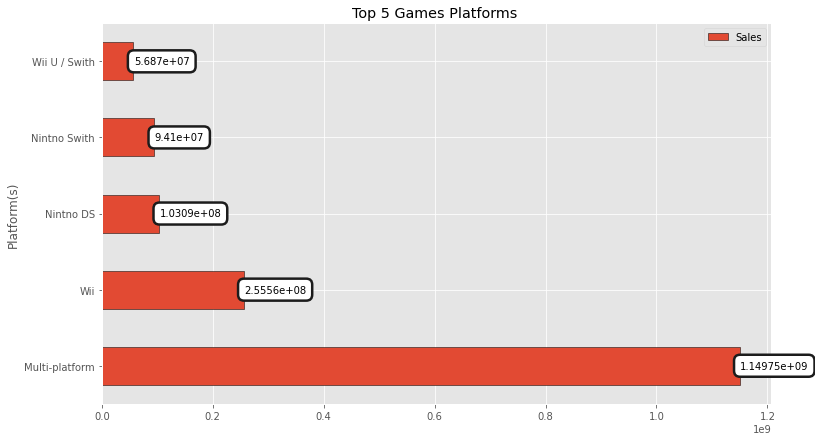

In [14]:
toppplt=pd.pivot_table(df,index='Platform(s)',values='Sales',aggfunc='sum')
toppplt=toppplt.sort_values('Sales',ascending=False)
toppplt=toppplt.head(5)
p2=toppplt.plot(kind='barh',figsize=(12,7),title='Top 5 Games Platforms ',edgecolor = 'black')
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

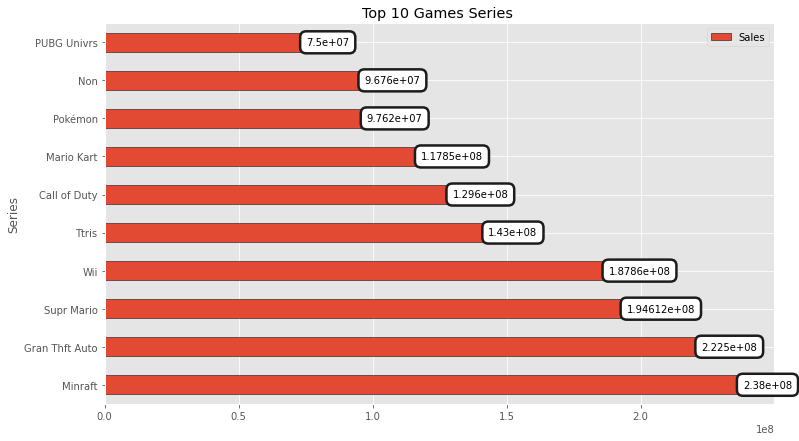

In [15]:
topsr=pd.pivot_table(df,index='Series',values='Sales',aggfunc='sum')
topsr=topsr.sort_values('Sales',ascending=False)
topsr=topsr.head(10)

p3=topsr.plot(kind='barh',figsize=(12,7),title='Top 10 Games Series ',edgecolor = 'black')
p3.bar_label(p3.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

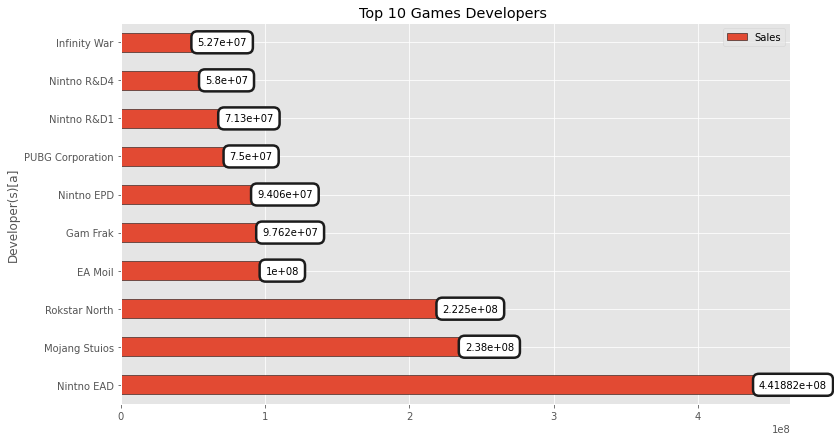

In [16]:
dev=pd.pivot_table(df,index='Developer(s)[a]',values='Sales',aggfunc='sum')
dev=dev.sort_values('Sales',ascending=False)
dev=dev.head(10)
p5=dev.plot(kind='barh',figsize=(12,7),title='Top 10 Games Developers ',edgecolor = 'black')
p5.bar_label(p5.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

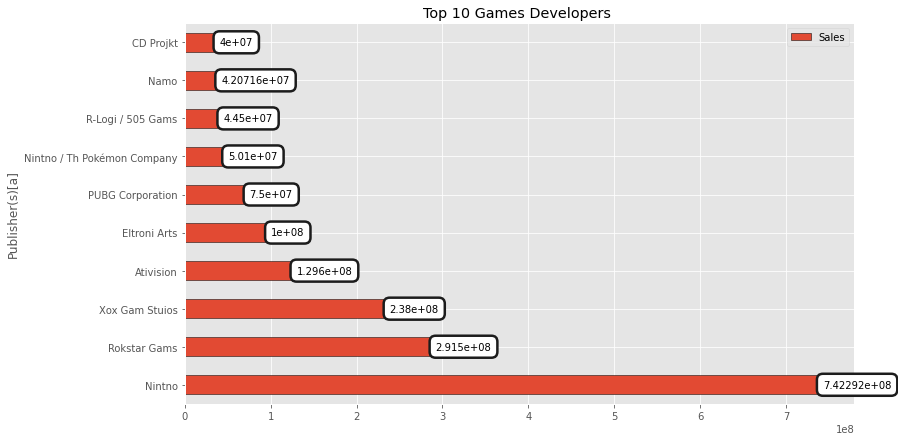

In [17]:
pub=pd.pivot_table(df,index='Publisher(s)[a]',values='Sales',aggfunc='sum')
pub=pub.sort_values('Sales',ascending=False)
pub=pub.head(10)
p6=pub.plot(kind='barh',figsize=(12,7),title='Top 10 Games Developers ',edgecolor = 'black')
p6.bar_label(p6.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

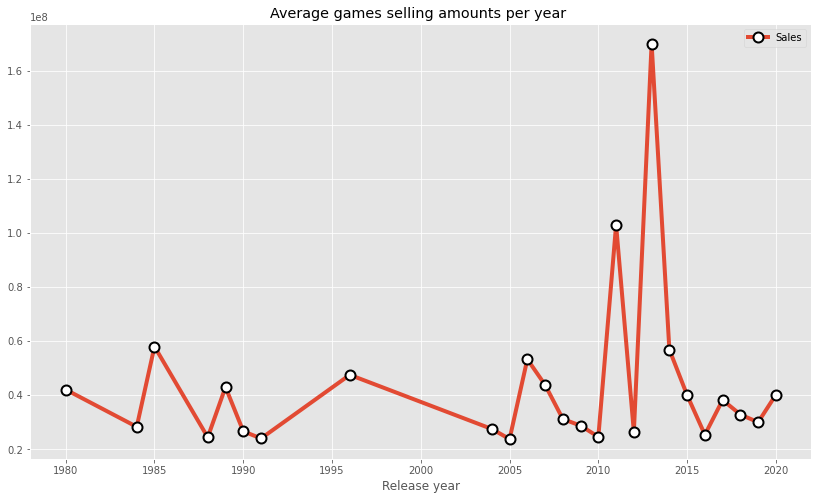

In [18]:
avyear=pd.pivot_table(df,index='Release year',values='Sales',aggfunc='mean')
avyear=avyear.sort_values('Release year',ascending=True)
avyear
avyear.plot(kind='line',figsize=(14,8),title='Average games selling amounts per year ',marker="o",linewidth=4,markersize=10,markerfacecolor="white",markeredgecolor="black",markeredgewidth=2)
plt.show()

**Is there a Correlation between Year and selling amount?**

In [19]:
df[['Release year','Sales']].corr()

,Release year,Sales
Release year,1.000000,0.067755
Sales,0.067755,1.000000


In [20]:
df.head()

,Rank,Title,Sales,Series,Platform(s),Developer(s)[a],Publisher(s)[a],Release year
0,1.0,Minraft,238000000,Minraft,Multi-platform,Mojang Stuios,Xox Gam Stuios,2011
1,2.0,Gran Thft Auto V,170000000,Gran Thft Auto,Multi-platform,Rokstar North,Rokstar Gams,2013
2,3.0,Ttris (EA),100000000,Ttris,Multi-platform,EA Moil,Eltroni Arts,2006
3,4.0,Wii Sports,82900000,Wii,Wii,Nintno EAD,Nintno,2006
4,5.0,PUBG: Battlgrouns,75000000,PUBG Univrs,Multi-platform,PUBG Corporation,PUBG Corporation,2017


**Thank you for your visit! Don't forget to upvote this notebook if you like it!**